# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [7]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('../data/car_evaluation.csv', header=None)

## Análisis exploratorio de datos

In [8]:
#Visualizacion del dataframe
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
#Analizamos el shape del objeto
df_car.shape

(1728, 7)

In [11]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [12]:
#Vericamos la transformacion
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [15]:
#Visualizamos los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [118]:
# Exploremos un poco mas la variable target
df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [119]:
#Verificamos valores missings
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [120]:
#Separamos en X e y

X, y = df_car.drop('class', axis=1), df_car['class']

In [121]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [122]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [123]:
y_train.shape, y_test.shape

((1209,), (519,))

In [124]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [125]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [126]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion

import category_encoders as ce ### Libreria que permite transformar los valores categoricos a numericos

columnas = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety']

encoder = ce.OrdinalEncoder(cols=columnas)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [127]:
#Verificamos la transformacion
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [128]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0)   ## Puede que a mayor cantidad de datos no esté mal aumentar la profundidad máxima.

In [129]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [130]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [131]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión
* Matriz de confusión: de esta se desprenden otras métricas como la precisión, sensibilidad, especificidad y F1.
* El error tipo I es el error de falsos positivos y el error tipo II es el error de falsos negativos.
* El error tipo II es el mas grave en terminos médicos

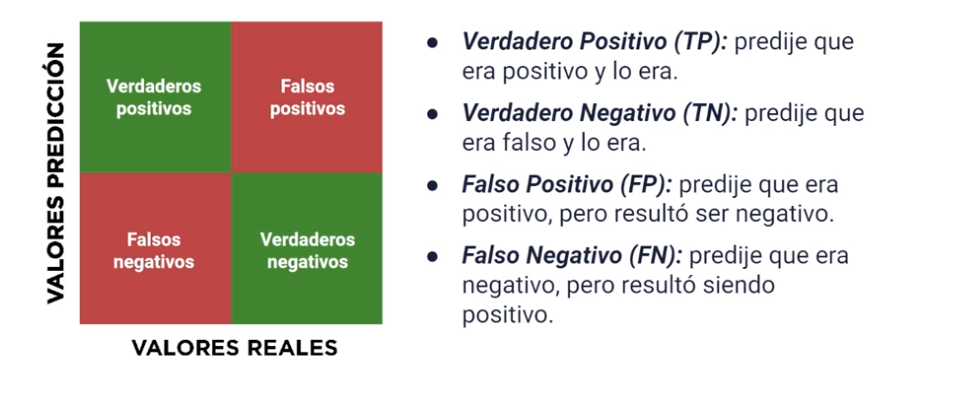

### Otras métricas
* Accuracy: mide la proporción de predicciones correctas.
    
    * Formula: (TP + TN) / (TP + TN + FP + FN)

* Precision: mide la proporción de verdaderos positivos sobre todos los positivos. 'Cuando tira, tira bien'
    * Formula: TP / (TP + FP)

* Recall (o sensitivity): mide la proporción de verdaderos positivos sobre todos los positivos reales.  'Casos positivos correctamente identificados'
    * Formula: TP / (TP + FN)

* Especificidad: mide la proporción de verdaderos negativos sobre todos los negativos reales. 'Casos negativos correctamente identificados'
    * Formula: TN / (TN + FP)

* F1: es la media armónica entre precision y recall.
    * Formula: 2 * (Precision * Recall) / (Precision + Recall)

#### **IMPORTANTE**
verificar solo hacer fit transform a los escaladores una vez

In [132]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es: ', train_accuracy_tree)
print('El accuracy en test es: ', test_accuracy_tree)

El accuracy en train es:  0.7733664185277088
El accuracy en test es:  0.7591522157996147


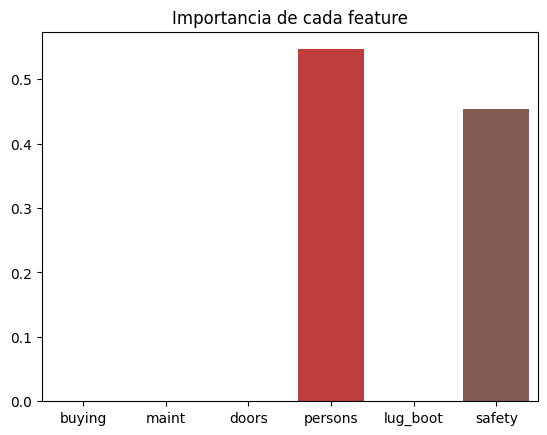

In [133]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns

sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada feature')
plt.show()

**Reto propuesto: Entrenar el modelo usando solamente estas dos variables**

## Entrenamiento de modelo de clasificación con random forest

**Nota:** 
Un random forest es un meta estimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. El tamaño de la submuestra se controla con el parámetro max_samples si bootstrap=True (el cual es predeterminado); de lo contrario, se usa todo el conjunto de datos para construir cada árbol.

El numero de estimadores(n_estimators) no debe superar 10 ya que nuestro dataset no es muy grande.

In [134]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

                            ## n_estimators define el numero de arboles a crear, entre menos datos, es mejor menos arboles
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [135]:
#Calculo de las predicciones en Train y Test

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [136]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
accuracy_train = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
accuracy_test = accuracy_score(y_test, y_test_pred_rf)

print('el accuracy en el train es de :', accuracy_train)
print('el accuracy en el test es de :', accuracy_test)


#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

el accuracy en el train es de : 0.9942100909842845
el accuracy en el test es de : 0.8863198458574181


In [137]:
# Visualizacion de las feature importantes
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=0)
feature_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

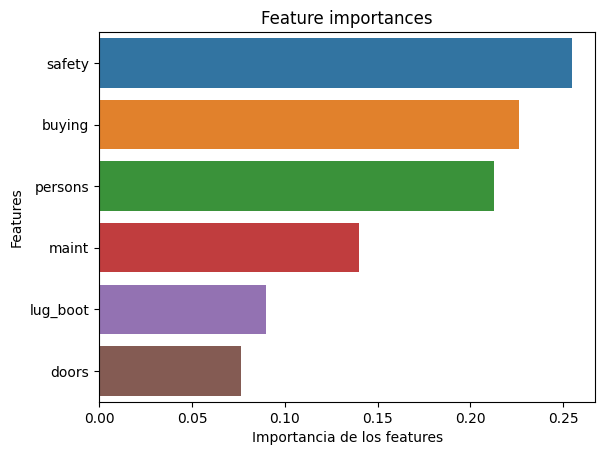

In [138]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Importancia de los features')
plt.ylabel('Features')
plt.title('Feature importances')
plt.show

<AxesSubplot:>

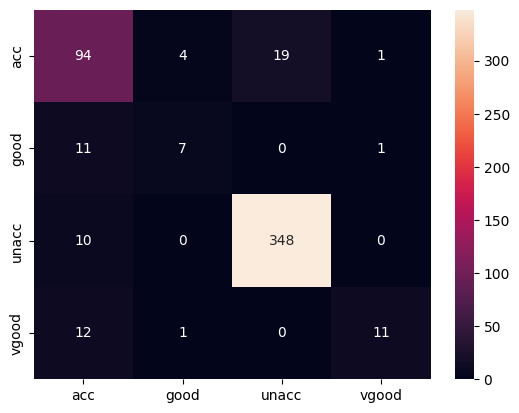

In [142]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get unique labels
class_names = np.unique(np.concatenate((y_test, y_test_pred_rf)))

cm = confusion_matrix(y_test, y_test_pred_rf, labels=class_names)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

In [144]:
## reporte de clasificacion

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

